# 逻辑回归评分卡模型

##  导入库

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression as LR

## 数据探索以及数据预处理

In [2]:
data = pd.read_csv(r"rankingcard.csv",index_col=0)

### 探索数据

In [3]:
#观察数据类型
data.head()#注意可以看到第一列为标签，剩下的10列为特征

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [4]:
#观察数据结构
data.shape

(150000, 11)

In [5]:
#观察数据字段
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150000 entries, 1 to 150000
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      150000 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 2   age                                   150000 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 4   DebtRatio                             150000 non-null  float64
 5   MonthlyIncome                         120269 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 7   NumberOfTimes90DaysLate               150000 non-null  int64  
 8   NumberRealEstateLoansOrLines          150000 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 10  NumberOfDependents                    146076 non-null  float64
dtype

### 去除重复值 

In [6]:
#去除重复值，inplace=True表示替换原数据
data.drop_duplicates(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149391 entries, 1 to 150000
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      149391 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  149391 non-null  float64
 2   age                                   149391 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  149391 non-null  int64  
 4   DebtRatio                             149391 non-null  float64
 5   MonthlyIncome                         120170 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       149391 non-null  int64  
 7   NumberOfTimes90DaysLate               149391 non-null  int64  
 8   NumberRealEstateLoansOrLines          149391 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  149391 non-null  int64  
 10  NumberOfDependents                    145563 non-null  float64
dtype

In [7]:
#删除之后千恢复索引
data.index = range(data.shape[0])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149391 entries, 0 to 149390
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      149391 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  149391 non-null  float64
 2   age                                   149391 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  149391 non-null  int64  
 4   DebtRatio                             149391 non-null  float64
 5   MonthlyIncome                         120170 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       149391 non-null  int64  
 7   NumberOfTimes90DaysLate               149391 non-null  int64  
 8   NumberRealEstateLoansOrLines          149391 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  149391 non-null  int64  
 10  NumberOfDependents                    145563 non-null  float64
dtype

### 填补缺失值

In [8]:
#探索缺失值
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149391 entries, 0 to 149390
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      149391 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  149391 non-null  float64
 2   age                                   149391 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  149391 non-null  int64  
 4   DebtRatio                             149391 non-null  float64
 5   MonthlyIncome                         120170 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       149391 non-null  int64  
 7   NumberOfTimes90DaysLate               149391 non-null  int64  
 8   NumberRealEstateLoansOrLines          149391 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  149391 non-null  int64  
 10  NumberOfDependents                    145563 non-null  float64
dtype

In [9]:
#返回空值的个数
data.isnull().sum()

SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29221
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3828
dtype: int64

In [10]:
data.isnull().sum()

SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29221
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3828
dtype: int64

In [11]:
#返回空值的比例
data.isnull().mean()

SeriousDlqin2yrs                        0.000000
RevolvingUtilizationOfUnsecuredLines    0.000000
age                                     0.000000
NumberOfTime30-59DaysPastDueNotWorse    0.000000
DebtRatio                               0.000000
MonthlyIncome                           0.195601
NumberOfOpenCreditLinesAndLoans         0.000000
NumberOfTimes90DaysLate                 0.000000
NumberRealEstateLoansOrLines            0.000000
NumberOfTime60-89DaysPastDueNotWorse    0.000000
NumberOfDependents                      0.025624
dtype: float64

#### 用均值填补家庭人数

In [12]:
#这里用均值填补家庭人数这一项 
data["NumberOfDependents"].fillna(int(data["NumberOfDependents"].mean()),inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149391 entries, 0 to 149390
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      149391 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  149391 non-null  float64
 2   age                                   149391 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  149391 non-null  int64  
 4   DebtRatio                             149391 non-null  float64
 5   MonthlyIncome                         120170 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       149391 non-null  int64  
 7   NumberOfTimes90DaysLate               149391 non-null  int64  
 8   NumberRealEstateLoansOrLines          149391 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  149391 non-null  int64  
 10  NumberOfDependents                    149391 non-null  float64
dtype

#### 用随机森林填补月收入

In [13]:
def fill_missing_rf(X,y,to_fill):

    """
    使用随机森林填补一个特征的缺失值的函数

    参数：
    X：要填补的特征矩阵
    y：完整的，没有缺失值的标签
    to_fill：字符串，要填补的那一列的名称
    """

    #构建我们的新特征矩阵和新标签
    df = X.copy() 
    fill = df.loc[:,to_fill] 
    df = pd.concat([df.loc[:,df.columns != to_fill],pd.DataFrame(y)],axis=1)

    # 找出我们的训练集和测试集
    Ytrain = fill[fill.notnull()]
    Ytest = fill[fill.isnull()]
    Xtrain = df.iloc[Ytrain.index,:]
    Xtest = df.iloc[Ytest.index,:]

    #用随机森林回归来填补缺失值
    from sklearn.ensemble import RandomForestRegressor as rfr
    rfr = rfr(n_estimators=100).fit(Xtrain, Ytrain)
    Ypredict = rfr.predict(Xtest)

    return Ypredict

In [14]:
X = data.iloc[:,1:]
y = data["SeriousDlqin2yrs"]
X.shape

(149391, 10)

In [15]:
#求得需要填补的缺失值
y_pred = fill_missing_rf(X,y,"MonthlyIncome")

In [16]:
#确认得到y_pred个数
y_pred.shape

(29221,)

In [17]:
#确认实际缺失值的个数
data.loc[:,"MonthlyIncome"].isnull().sum()

29221

In [18]:
data.loc[data.loc[:,"MonthlyIncome"].isnull(),"MonthlyIncome"]

6        NaN
8        NaN
16       NaN
32       NaN
41       NaN
          ..
149368   NaN
149369   NaN
149376   NaN
149384   NaN
149388   NaN
Name: MonthlyIncome, Length: 29221, dtype: float64

In [19]:
#确认个数没有问题，我们就可以将数据覆盖了
data.loc[data.loc[:,"MonthlyIncome"].isnull(),"MonthlyIncome"] = y_pred

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149391 entries, 0 to 149390
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      149391 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  149391 non-null  float64
 2   age                                   149391 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  149391 non-null  int64  
 4   DebtRatio                             149391 non-null  float64
 5   MonthlyIncome                         149391 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       149391 non-null  int64  
 7   NumberOfTimes90DaysLate               149391 non-null  int64  
 8   NumberRealEstateLoansOrLines          149391 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  149391 non-null  int64  
 10  NumberOfDependents                    149391 non-null  float64
dtype

### 描述性统计处理异常值

In [20]:
#描述性统计
data.describe([0.01,0.1,0.25,.5,.75,.9,.99]).T

,count,mean,std,min,1%,10%,25%,50%,75%,90%,99%,max
SeriousDlqin2yrs,149391.0,0.066999,0.250021,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.0
RevolvingUtilizationOfUnsecuredLines,149391.0,6.071087,250.263672,0.0,0.0,0.003199,0.030132,0.154235,0.556494,0.978007,1.093922,50708.0
age,149391.0,52.306237,14.725962,0.0,24.0,33.000000,41.000000,52.000000,63.000000,72.000000,87.000000,109.0
NumberOfTime30-59DaysPastDueNotWorse,149391.0,0.393886,3.852953,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,4.000000,98.0
DebtRatio,149391.0,354.436740,2041.843455,0.0,0.0,0.034991,0.177441,0.368234,0.875279,1275.000000,4985.100000,329664.0
MonthlyIncome,149391.0,5424.049132,13230.006091,0.0,0.0,0.180000,1800.000000,4420.000000,7416.000000,10800.000000,23250.000000,3008750.0
NumberOfOpenCreditLinesAndLoans,149391.0,8.480892,5.136515,0.0,0.0,3.000000,5.000000,8.000000,11.000000,15.000000,24.000000,58.0
NumberOfTimes90DaysLate,149391.0,0.238120,3.826165,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,98.0
NumberRealEstateLoansOrLines,149391.0,1.022391,1.130196,0.0,0.0,0.000000,0.000000,1.000000,2.000000,2.000000,4.000000,54.0
NumberOfTime60-89DaysPastDueNotWorse,149391.0,0.212503,3.810523,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,98.0


#### 异常值：年龄为0的用户

In [21]:
#异常值也被我们观察到，年龄的最小值居然有0，这不符合银行的业务需求，即便是儿童账户也要至少8岁，我们可以
# 查看一下年龄为0的人有多少
(data["age"] == 0).sum()

1

In [22]:
#发现只有一个人年龄为0，可以判断这肯定是录入失误造成的，可以当成是缺失值来处理，直接删除掉这个样本
data = data[data["age"] != 0]

#### 其他异常值
另外，有三个指标看起来很奇怪：
 
"NumberOfTime30-59DaysPastDueNotWorse"

"NumberOfTime60-89DaysPastDueNotWorse"


"NumberOfTimes90DaysLate"
 
这三个指标分别是“过去两年内出现35-59天逾期但是没有发展的更坏的次数”，“过去两年内出现60-89天逾期但是没
有发展的更坏的次数”,“过去两年内出现90天逾期的次数”。这三个指标，在99%的分布的时候依然是2，最大值却是
98，看起来非常奇怪。一个人在过去两年内逾期35~59天98次，一年6个60天，两年内逾期98次这是怎么算出来的？
 
我们可以去咨询业务人员，请教他们这个逾期次数是如何计算的。如果这个指标是正常的，那这些两年内逾期了98次的
客户，应该都是坏客户。在我们无法询问他们情况下，我们查看一下有多少个样本存在这种异常：

In [23]:
data[data.loc[:,"NumberOfTimes90DaysLate"] > 90]

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1732,1,1.0,27,98,0.0,2700.000000,0,98,0,98,0.0
2285,0,1.0,22,98,0.0,1253.329614,0,98,0,98,0.0
3883,0,1.0,38,98,12.0,2829.700000,0,98,0,98,0.0
4416,0,1.0,21,98,0.0,0.000000,0,98,0,98,0.0
4704,0,1.0,21,98,0.0,2000.000000,0,98,0,98,0.0
...,...,...,...,...,...,...,...,...,...,...,...
146667,1,1.0,25,98,0.0,2048.238333,0,98,0,98,0.0
147180,1,1.0,68,98,255.0,12.190000,0,98,0,98,0.0
148548,1,1.0,24,98,54.0,620.260000,0,98,0,98,0.0
148634,0,1.0,26,98,0.0,2000.000000,0,98,0,98,0.0


In [24]:
data[data.loc[:,"NumberOfTimes90DaysLate"] > 90].count()
#有225个样本存在这样的情况，并且这些样本，我们观察一下，标签并不都是1，他们并不都是坏客户。

SeriousDlqin2yrs                        225
RevolvingUtilizationOfUnsecuredLines    225
age                                     225
NumberOfTime30-59DaysPastDueNotWorse    225
DebtRatio                               225
MonthlyIncome                           225
NumberOfOpenCreditLinesAndLoans         225
NumberOfTimes90DaysLate                 225
NumberRealEstateLoansOrLines            225
NumberOfTime60-89DaysPastDueNotWorse    225
NumberOfDependents                      225
dtype: int64

In [25]:
data.loc[:,"NumberOfTimes90DaysLate"].value_counts()
#98 96 为异常值，应该把它们删除。

0     141107
1       5232
2       1555
3        667
4        291
98       220
5        131
6         80
7         38
8         21
9         19
10         8
11         5
96         5
13         4
12         2
14         2
15         2
17         1
Name: NumberOfTimes90DaysLate, dtype: int64

In [26]:
#删除异常值
data = data[data.loc[:,"NumberOfTimes90DaysLate"] < 90]

In [27]:
#一定要恢复索引
data.index = range(data.shape[0])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149165 entries, 0 to 149164
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      149165 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  149165 non-null  float64
 2   age                                   149165 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  149165 non-null  int64  
 4   DebtRatio                             149165 non-null  float64
 5   MonthlyIncome                         149165 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       149165 non-null  int64  
 7   NumberOfTimes90DaysLate               149165 non-null  int64  
 8   NumberRealEstateLoansOrLines          149165 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  149165 non-null  int64  
 10  NumberOfDependents                    149165 non-null  float64
dtype

In [28]:
data.describe([0.01,0.1,0.25,.5,.75,.9,.99]).T
#不做量纲统一和标准化，因为业务人员需要原本量纲作为参考。

,count,mean,std,min,1%,10%,25%,50%,75%,90%,99%,max
SeriousDlqin2yrs,149165.0,0.066188,0.248612,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,1.0
RevolvingUtilizationOfUnsecuredLines,149165.0,6.078770,250.453111,0.0,0.0,0.003174,0.030033,0.153615,0.553698,0.97502,1.094061,50708.0
age,149165.0,52.331076,14.714114,21.0,24.0,33.000000,41.000000,52.000000,63.000000,72.00000,87.000000,109.0
NumberOfTime30-59DaysPastDueNotWorse,149165.0,0.246720,0.698935,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.00000,3.000000,13.0
DebtRatio,149165.0,354.963542,2043.344496,0.0,0.0,0.036385,0.178211,0.368619,0.876994,1277.30000,4989.360000,329664.0
MonthlyIncome,149165.0,5428.364395,13239.208395,0.0,0.0,0.180000,1800.000000,4434.000000,7418.000000,10800.00000,23250.000000,3008750.0
NumberOfOpenCreditLinesAndLoans,149165.0,8.493688,5.129841,0.0,1.0,3.000000,5.000000,8.000000,11.000000,15.00000,24.000000,58.0
NumberOfTimes90DaysLate,149165.0,0.090725,0.486354,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,2.000000,17.0
NumberRealEstateLoansOrLines,149165.0,1.023927,1.130350,0.0,0.0,0.000000,0.000000,1.000000,2.000000,2.00000,4.000000,54.0
NumberOfTime60-89DaysPastDueNotWorse,149165.0,0.065069,0.330675,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,2.000000,11.0


In [29]:
data.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


### 处理标签分布不均

In [30]:
#探索标签的分布
X = data.iloc[:,1:]
y = data.iloc[:,0]
 
y.value_counts()#查看每一类别值得数据量，查看样本是否均衡

0    139292
1      9873
Name: SeriousDlqin2yrs, dtype: int64

In [31]:
#imblearn是专门用来处理不平衡数据集的库，在处理样本不均衡问题中性能高过sklearn很多
#imblearn里面也是一个个的类，也需要进行实例化，fit拟合，和sklearn用法相似
#重点：pip install imblearn 
import imblearn

In [32]:
imblearn.__version__

'0.8.1'

In [34]:
from imblearn.over_sampling import SMOTE #导入上采样 SMOTE方法

sm = SMOTE(random_state=42)
X,y = sm.fit_resample(X,y) #返回已经上采样完毕过后的特征矩阵和标签

In [35]:
y.value_counts()

0    139292
1    139292
Name: SeriousDlqin2yrs, dtype: int64

In [36]:
X.shape

(278584, 10)

In [37]:
y.shape

(278584,)

In [38]:
pd.Series(y).value_counts()

0    139292
1    139292
Name: SeriousDlqin2yrs, dtype: int64

## 划分数据集

In [39]:
from sklearn.model_selection import train_test_split
X = pd.DataFrame(X)
y = pd.DataFrame(y)
 
X_train, X_vali, Y_train, Y_vali = train_test_split(X,y,test_size=0.3,random_state=420)

In [40]:
model_data = pd.concat([Y_train, X_train], axis=1)#训练集 标签为第一列
model_data.index = range(model_data.shape[0])
model_data.columns = data.columns

In [41]:
vali_data = pd.concat([Y_vali, X_vali], axis=1)#验证集 标签为第一列
vali_data.index = range(vali_data.shape[0])
vali_data.columns = data.columns

In [42]:
model_data.to_csv(r"model_data.csv")#训练数据
vali_data.to_csv(r"vali_data.csv")#验证数据

## 特征处理-分箱

**1.cut 等距分箱**

**2.qcut 等频分箱**

pd.qcut，基于分位数的分箱函数，本质是将连续型变量离散化

只能够处理一维数据。返回箱子的上限和下限

参数q：要分箱的个数

参数retbins=True来要求同时返回结构为索引为样本索引，元素为分到的箱子的Series

现在返回两个值：每个样本属于哪个箱子，以及所有箱子的上限和下限

### “age”分箱

In [43]:
model_data.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0,0.015404,53,0,0.121802,4728.0,5,0,0,0,0.000000
1,0,0.168311,63,0,0.141964,1119.0,5,0,0,0,0.000000
2,1,1.063570,39,1,0.417663,3500.0,5,1,0,2,3.716057
3,0,0.088684,73,0,0.522822,5301.0,11,0,2,0,0.000000
4,1,0.622999,53,0,0.423650,13000.0,9,0,2,0,0.181999


In [44]:
#按照等频对需要分箱的列进行分箱

#“age”为例子
model_data["qcut"],updown = pd.qcut(model_data["age"], retbins=True, q=20)#等频分箱

In [45]:
pd.qcut(model_data["age"], retbins=True, q=20)

(0         (52.0, 54.0]
 1         (61.0, 64.0]
 2         (36.0, 39.0]
 3         (68.0, 74.0]
 4         (52.0, 54.0]
               ...     
 195003    (31.0, 34.0]
 195004    (48.0, 50.0]
 195005    (45.0, 46.0]
 195006    (61.0, 64.0]
 195007    (52.0, 54.0]
 Name: age, Length: 195008, dtype: category
 Categories (20, interval[float64]): [(20.999, 28.0] < (28.0, 31.0] < (31.0, 34.0] < (34.0, 36.0] ... (61.0, 64.0] < (64.0, 68.0] < (68.0, 74.0] < (74.0, 107.0]],
 array([ 21.,  28.,  31.,  34.,  36.,  39.,  41.,  43.,  45.,  46.,  48.,
         50.,  52.,  54.,  56.,  58.,  61.,  64.,  68.,  74., 107.]))

In [46]:
updown

array([ 21.,  28.,  31.,  34.,  36.,  39.,  41.,  43.,  45.,  46.,  48.,
        50.,  52.,  54.,  56.,  58.,  61.,  64.,  68.,  74., 107.])

In [47]:
#在这里时让model_data新添加一列叫做“分箱”，这一列其实就是每个样本所对应的箱子
model_data.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,qcut
0,0,0.015404,53,0,0.121802,4728.0,5,0,0,0,0.000000,"(52.0, 54.0]"
1,0,0.168311,63,0,0.141964,1119.0,5,0,0,0,0.000000,"(61.0, 64.0]"
2,1,1.063570,39,1,0.417663,3500.0,5,1,0,2,3.716057,"(36.0, 39.0]"
3,0,0.088684,73,0,0.522822,5301.0,11,0,2,0,0.000000,"(68.0, 74.0]"
4,1,0.622999,53,0,0.423650,13000.0,9,0,2,0,0.181999,"(52.0, 54.0]"


In [48]:
model_data["qcut"].value_counts()

(36.0, 39.0]      12682
(20.999, 28.0]    11818
(58.0, 61.0]      11384
(48.0, 50.0]      11120
(46.0, 48.0]      11013
(31.0, 34.0]      10810
(50.0, 52.0]      10515
(43.0, 45.0]      10397
(61.0, 64.0]      10169
(39.0, 41.0]       9772
(52.0, 54.0]       9706
(41.0, 43.0]       9654
(28.0, 31.0]       9480
(74.0, 107.0]      9127
(64.0, 68.0]       8923
(54.0, 56.0]       8710
(68.0, 74.0]       8675
(56.0, 58.0]       7888
(34.0, 36.0]       7479
(45.0, 46.0]       5686
Name: qcut, dtype: int64

In [49]:
#所有箱子的上限和下限
updown

array([ 21.,  28.,  31.,  34.,  36.,  39.,  41.,  43.,  45.,  46.,  48.,
        50.,  52.,  54.,  56.,  58.,  61.,  64.,  68.,  74., 107.])

In [50]:
# 统计每个分箱中0和1的数量
# 这里使用了数据透视表的功能groupby
coount_y0 = model_data[model_data["SeriousDlqin2yrs"] == 0].groupby(by="qcut").count()["SeriousDlqin2yrs"]

coount_y1 = model_data[model_data["SeriousDlqin2yrs"] == 1].groupby(by="qcut").count()["SeriousDlqin2yrs"]

In [51]:
coount_y1

qcut
(20.999, 28.0]    7575
(28.0, 31.0]      5909
(31.0, 34.0]      6735
(34.0, 36.0]      4571
(36.0, 39.0]      7500
(39.0, 41.0]      5816
(41.0, 43.0]      5652
(43.0, 45.0]      6008
(45.0, 46.0]      3267
(46.0, 48.0]      6200
(48.0, 50.0]      6220
(50.0, 52.0]      5787
(52.0, 54.0]      5025
(54.0, 56.0]      4033
(56.0, 58.0]      3405
(58.0, 61.0]      4801
(61.0, 64.0]      3201
(64.0, 68.0]      2300
(68.0, 74.0]      1922
(74.0, 107.0]     1390
Name: SeriousDlqin2yrs, dtype: int64

In [52]:
updown

array([ 21.,  28.,  31.,  34.,  36.,  39.,  41.,  43.,  45.,  46.,  48.,
        50.,  52.,  54.,  56.,  58.,  61.,  64.,  68.,  74., 107.])

In [53]:
#num_bins值分别为每个区间的上界，下界，0出现的次数，1出现的次数
num_bins = [*zip(updown,updown[1:],coount_y0,coount_y1)]
 
#注意zip会按照最短列来进行结合
num_bins

[(21.0, 28.0, 4243, 7575),
 (28.0, 31.0, 3571, 5909),
 (31.0, 34.0, 4075, 6735),
 (34.0, 36.0, 2908, 4571),
 (36.0, 39.0, 5182, 7500),
 (39.0, 41.0, 3956, 5816),
 (41.0, 43.0, 4002, 5652),
 (43.0, 45.0, 4389, 6008),
 (45.0, 46.0, 2419, 3267),
 (46.0, 48.0, 4813, 6200),
 (48.0, 50.0, 4900, 6220),
 (50.0, 52.0, 4728, 5787),
 (52.0, 54.0, 4681, 5025),
 (54.0, 56.0, 4677, 4033),
 (56.0, 58.0, 4483, 3405),
 (58.0, 61.0, 6583, 4801),
 (61.0, 64.0, 6968, 3201),
 (64.0, 68.0, 6623, 2300),
 (68.0, 74.0, 6753, 1922),
 (74.0, 107.0, 7737, 1390)]

### 计算WOE IV 值

In [54]:
columns = ['min','max','count_0','count_1']
df_age = pd.DataFrame(num_bins,columns=columns)
df_age.head()

,min,max,count_0,count_1
0,21.0,28.0,4243,7575
1,28.0,31.0,3571,5909
2,31.0,34.0,4075,6735
3,34.0,36.0,2908,4571
4,36.0,39.0,5182,7500


In [55]:
#计算WOE和BAD RATE
#BAD RATE与bad%不是一个东西
#BAD RATE是一个箱中，坏的样本所占的比例 (bad/total)
#而bad%是一个箱中的坏样本占整个特征中的坏样本的比例
 
#计算 WOE值
#df_age["total"] = df_age.count_0 + df_age.count_1#一个箱子当中所有的样本数
#df_age["percentage"] = df_age.total / df_age.total.sum()#一个箱子里的样本数，占所有样本的比例
#df_age["bad_rate"] = df_age.count_1 / df_age.total#一个箱子坏样本的数量占一个箱子里边所有样本数的比例
df_age["good%"] = df_age.count_0/df_age.count_0.sum()#这个箱子里好样本个数/所有好样本的个数
df_age["bad%"] = df_age.count_1/df_age.count_1.sum()#这个箱子里坏样本个数/所有坏样本的个数
df_age["woe"] = np.log(df_age["good%"] / df_age["bad%"])

In [56]:
df_age.head()

,min,max,count_0,count_1,good%,bad%,woe
0,21.0,28.0,4243,7575,0.043433,0.077838,-0.583419
1,28.0,31.0,3571,5909,0.036554,0.060719,-0.507467
2,31.0,34.0,4075,6735,0.041713,0.069207,-0.506283
3,34.0,36.0,2908,4571,0.029767,0.046970,-0.456102
4,36.0,39.0,5182,7500,0.053045,0.077068,-0.373548


In [57]:
#计算IV值
rate = df_age["good%"] - df_age["bad%"]
iv = np.sum(rate * df_age.woe)

In [58]:
iv #‘age’的IV值很好

0.3530261425159574

In [59]:
#封装成WOE函数
 
def get_woe(num_bins):
    # 通过 num_bins 数据计算 woe
    columns = ["min","max","count_0","count_1"]
    df = pd.DataFrame(num_bins,columns=columns)

    #df["total"] = df.count_0 + df.count_1#一个箱子当中所有的样本数
    #df["percentage"] = df.total / df.total.sum()#一个箱子里的样本数，占所有样本的比例
    #df["bad_rate"] = df.count_1 / df.total#一个箱子坏样本的数量占一个箱子里边所有样本数的比例
    df["good%"] = df.count_0/df.count_0.sum()#这个箱子里好样本个数/所有好样本的个数
    df["bad%"] = df.count_1/df.count_1.sum()#这个箱子里坏样本个数/所有坏样本的个数
    df["woe"] = np.log(df["good%"] / df["bad%"])
    return df

In [60]:
#封装成IV函数
def get_iv(df):
    rate = df["good%"] - df["bad%"]
    iv = np.sum(rate * df.woe)
    return iv

### 卡方检验

本质是为了检验两列数据的相似性，现在我们用来检验两个相邻的箱中数据的相似性。
换句话说就是检查某一个类别型的自变量和因变量是否相关。例如：我们的因变量（标签）为买不买，某一个自变量是男女、是否相关。

假设是变量独立的,P_value大，认为没有变量之间没有显著性影响,则接受原假设,变量独立。

1.找到相邻两个箱子之间的p-value（p-value越大代表两个组越相似，则合并这两个相邻组）

2.重复上述过程

In [61]:
num_bins_ = num_bins.copy()

import matplotlib.pyplot as plt
import scipy

In [62]:
num_bins_

[(21.0, 28.0, 4243, 7575),
 (28.0, 31.0, 3571, 5909),
 (31.0, 34.0, 4075, 6735),
 (34.0, 36.0, 2908, 4571),
 (36.0, 39.0, 5182, 7500),
 (39.0, 41.0, 3956, 5816),
 (41.0, 43.0, 4002, 5652),
 (43.0, 45.0, 4389, 6008),
 (45.0, 46.0, 2419, 3267),
 (46.0, 48.0, 4813, 6200),
 (48.0, 50.0, 4900, 6220),
 (50.0, 52.0, 4728, 5787),
 (52.0, 54.0, 4681, 5025),
 (54.0, 56.0, 4677, 4033),
 (56.0, 58.0, 4483, 3405),
 (58.0, 61.0, 6583, 4801),
 (61.0, 64.0, 6968, 3201),
 (64.0, 68.0, 6623, 2300),
 (68.0, 74.0, 6753, 1922),
 (74.0, 107.0, 7737, 1390)]

In [63]:
x1 = num_bins_[0][2:]
x2 = num_bins_[1][2:]
x1,x2
#不同的箱中的零和一的个数

((4243, 7575), (3571, 5909))

In [64]:
pv = scipy.stats.chi2_contingency([x1,x2])
pv

(6.986367164924073,
 0.00821328900339826,
 1,
 array([[4335.89313551, 7482.10686449],
        [3478.10686449, 6001.89313551]]))

In [65]:
pv = scipy.stats.chi2_contingency([x1,x2])[1]
pv 
# 0 返回 chi2 值，1 返回 p 值。

0.00821328900339826

In [66]:
pvs = []
for i in range(len(num_bins_)-1):
        x1 = num_bins_[i][2:]
        x2 = num_bins_[i+1][2: ]
        # 0 返回 chi2 值，1 返回 p 值。
        pv = scipy.stats.chi2_contingency([x1,x2])[1]#p值
        # chi2 = scipy.stats.chi2_contingency([x1,x2])[0]#计算卡方值
        pvs.append(pv)

In [67]:
pvs #19次卡方检验的p-value

[0.00821328900339826,
 0.979055378852224,
 0.10803569269487096,
 0.005882841346093778,
 0.5768430310195557,
 0.17325483061498378,
 0.2822060928993009,
 0.6987529437119304,
 0.15652042151520315,
 0.5969073477989576,
 0.18781950853545007,
 3.583510495671569e-06,
 1.391939476820211e-13,
 5.3028787459159316e-05,
 0.17482736186109066,
 4.329168343225526e-59,
 4.574354355360517e-18,
 2.0790457951149876e-08,
 2.139662375071393e-32]

In [68]:
pvs.index(max(pvs)) #取得最大p-value 让两个箱子合并

1

In [69]:
num_bins_

[(21.0, 28.0, 4243, 7575),
 (28.0, 31.0, 3571, 5909),
 (31.0, 34.0, 4075, 6735),
 (34.0, 36.0, 2908, 4571),
 (36.0, 39.0, 5182, 7500),
 (39.0, 41.0, 3956, 5816),
 (41.0, 43.0, 4002, 5652),
 (43.0, 45.0, 4389, 6008),
 (45.0, 46.0, 2419, 3267),
 (46.0, 48.0, 4813, 6200),
 (48.0, 50.0, 4900, 6220),
 (50.0, 52.0, 4728, 5787),
 (52.0, 54.0, 4681, 5025),
 (54.0, 56.0, 4677, 4033),
 (56.0, 58.0, 4483, 3405),
 (58.0, 61.0, 6583, 4801),
 (61.0, 64.0, 6968, 3201),
 (64.0, 68.0, 6623, 2300),
 (68.0, 74.0, 6753, 1922),
 (74.0, 107.0, 7737, 1390)]

In [70]:
num_bins_[1][0],num_bins_[2][1]

(28.0, 34.0)

In [71]:
num_bins_[1:3] = [(
            num_bins_[1][0],
            num_bins_[2][1],
            num_bins_[1][2]+num_bins_[2][2],
            num_bins_[1][3]+num_bins_[2][3])]
#合并第二组和第三组

In [72]:
len(num_bins_)

19

In [73]:
num_bins_

[(21.0, 28.0, 4243, 7575),
 (28.0, 34.0, 7646, 12644),
 (34.0, 36.0, 2908, 4571),
 (36.0, 39.0, 5182, 7500),
 (39.0, 41.0, 3956, 5816),
 (41.0, 43.0, 4002, 5652),
 (43.0, 45.0, 4389, 6008),
 (45.0, 46.0, 2419, 3267),
 (46.0, 48.0, 4813, 6200),
 (48.0, 50.0, 4900, 6220),
 (50.0, 52.0, 4728, 5787),
 (52.0, 54.0, 4681, 5025),
 (54.0, 56.0, 4677, 4033),
 (56.0, 58.0, 4483, 3405),
 (58.0, 61.0, 6583, 4801),
 (61.0, 64.0, 6968, 3201),
 (64.0, 68.0, 6623, 2300),
 (68.0, 74.0, 6753, 1922),
 (74.0, 107.0, 7737, 1390)]

### 通过IV值选择合适的箱子数

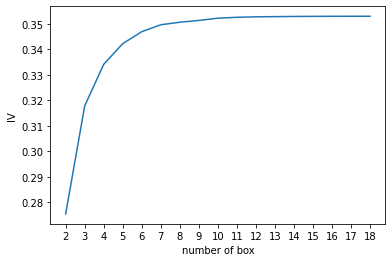

In [74]:
#通过IV值选择箱数
IV = []
axisx = []
 
while len(num_bins_) > 2:#大于设置的最低分箱个数
    pvs = []
    #获取 num_bins_两两之间的卡方检验的置信度（或卡方值）
    for i in range(len(num_bins_)-1):
        x1 = num_bins_[i][2:]
        x2 = num_bins_[i+1][2: ]
        # 0 返回 chi2 值，1 返回 p 值。
        pv = scipy.stats.chi2_contingency([x1,x2])[1]#p值
        # chi2 = scipy.stats.chi2_contingency([x1,x2])[0]#计算卡方值
        pvs.append(pv)
        
    # 通过 p 值进行处理。合并 p 值最大的两组
    i = pvs.index(max(pvs))
    num_bins_[i:i+2] = [(
            num_bins_[i][0],
            num_bins_[i+1][1],
            num_bins_[i][2]+num_bins_[i+1][2],
            num_bins_[i][3]+num_bins_[i+1][3])]
    
    bins_df = get_woe(num_bins_)#计算每次循环完得到箱子的WOE
    axisx.append(len(num_bins_))#合并后箱的个数
    IV.append(get_iv(bins_df))#计算每次循环完得到箱子的IV
    
plt.figure()
plt.plot(axisx,IV)
plt.xticks(axisx)
plt.xlabel("number of box")
plt.ylabel("IV")
plt.show()
#选择转折点处，也就是下坠最快的折线点，所以这里对于age来说选择箱数为6

In [75]:
# 将分箱过程定义成函数
def get_bin(num_bins_,n):
    while len(num_bins_) > n:
        pvs = []
        for i in range(len(num_bins_)-1):
            x1 = num_bins_[i][2:]
            x2 = num_bins_[i+1][2:]
            pv = scipy.stats.chi2_contingency([x1,x2])[1]
            # chi2 = scipy.stats.chi2_contingency([x1,x2])[0]
            pvs.append(pv)

        i = pvs.index(max(pvs))
        num_bins_[i:i+2] = [(
                num_bins_[i][0],
                num_bins_[i+1][1],
                num_bins_[i][2]+num_bins_[i+1][2],
                num_bins_[i][3]+num_bins_[i+1][3])]
    return num_bins_


In [76]:
afterbins = get_bin(num_bins,6)

afterbins

[(21.0, 36.0, 14797, 24790),
 (36.0, 54.0, 39070, 51475),
 (54.0, 61.0, 15743, 12239),
 (61.0, 64.0, 6968, 3201),
 (64.0, 74.0, 13376, 4222),
 (74.0, 107.0, 7737, 1390)]

In [77]:
bins_df = get_woe(num_bins)
#查看最终分箱过后的WOE值

bins_df
#希望每组的bad_rate相差越大越好；
# woe差异越大越好，应该具有单调性，随着箱的增加，要么由正到负，要么由负到正，只能有一个转折过程；
# 如果woe值大小变化是有两个转折，比如呈现w型，证明分箱过程有问题
# num_bins保留的信息越多越好

,min,max,count_0,count_1,good%,bad%,woe
0,21.0,36.0,14797,24790,0.151467,0.254735,-0.519852
1,36.0,54.0,39070,51475,0.399934,0.528942,-0.279577
2,54.0,61.0,15743,12239,0.161151,0.125764,0.247933
3,61.0,64.0,6968,3201,0.071327,0.032893,0.774029
4,64.0,74.0,13376,4222,0.136922,0.043384,1.149317
5,74.0,107.0,7737,1390,0.079199,0.014283,1.712875


### 封装选取分箱个数的函数

In [78]:
def graphforbestbin(DF, X, Y, n,q=20,graph=True):
    '''
    自动最优分箱函数，基于卡方检验的分箱

    参数：
    DF: 需要输入的数据
    X: 需要分箱的列名
    Y: 分箱数据对应的标签 Y 列名
    n: 保留分箱个数
    q: 初始分箱的个数
    graph: 是否要画出IV图像

    区间为前开后闭 (]

    '''
    
    DF = DF[[X,Y]].copy()

    DF["qcut"],bins = pd.qcut(DF[X], retbins=True, q=q,duplicates="drop")
    coount_y0 = DF.loc[DF[Y]==0].groupby(by="qcut").count()[Y]
    coount_y1 = DF.loc[DF[Y]==1].groupby(by="qcut").count()[Y]
    num_bins = [*zip(bins,bins[1:],coount_y0,coount_y1)]

    #判断每个箱子是否包含正负样本
    for i in range(q):
        if 0 in num_bins[0][2:]:
            num_bins[0:2] = [(
                num_bins[0][0],
                num_bins[1][1],
                num_bins[0][2]+num_bins[1][2],
                num_bins[0][3]+num_bins[1][3])]
            continue

        for i in range(len(num_bins)):
            if 0 in num_bins[i][2:]:
                num_bins[i-1:i+1] = [(
                    num_bins[i-1][0],
                    num_bins[i][1],
                    num_bins[i-1][2]+num_bins[i][2],
                    num_bins[i-1][3]+num_bins[i][3])]
                break
        else:
            break
    
    #定义WOE函数
    def get_woe(num_bins):
        columns = ["min","max","count_0","count_1"]
        df = pd.DataFrame(num_bins,columns=columns)
        df["total"] = df.count_0 + df.count_1
        df["percentage"] = df.total / df.total.sum()
        df["bad_rate"] = df.count_1 / df.total
        df["good%"] = df.count_0/df.count_0.sum()
        df["bad%"] = df.count_1/df.count_1.sum()
        df["woe"] = np.log(df["good%"] / df["bad%"])
        return df
    
    #定义IV函数
    def get_iv(df):
        rate = df["good%"] - df["bad%"]
        iv = np.sum(rate * df.woe)
        return iv
    
    #找最合理的分箱数n
    IV = []
    axisx = []
    while len(num_bins) > n:
        pvs = []
        for i in range(len(num_bins)-1):
            x1 = num_bins[i][2:]
            x2 = num_bins[i+1][2:]
            pv = scipy.stats.chi2_contingency([x1,x2])[1]
            pvs.append(pv)

        i = pvs.index(max(pvs))
        num_bins[i:i+2] = [(
            num_bins[i][0],
            num_bins[i+1][1],
            num_bins[i][2]+num_bins[i+1][2],
            num_bins[i][3]+num_bins[i+1][3])]

       
        bins_df = pd.DataFrame(get_woe(num_bins))
        axisx.append(len(num_bins))
        IV.append(get_iv(bins_df))
        
    if graph:
        plt.figure()
        plt.plot(axisx,IV)
        plt.xticks(axisx)
        plt.xlabel("number of box")
        plt.ylabel("IV")
        plt.show()
    return bins_df

In [79]:
model_data.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,qcut
0,0,0.015404,53,0,0.121802,4728.0,5,0,0,0,0.000000,"(52.0, 54.0]"
1,0,0.168311,63,0,0.141964,1119.0,5,0,0,0,0.000000,"(61.0, 64.0]"
2,1,1.063570,39,1,0.417663,3500.0,5,1,0,2,3.716057,"(36.0, 39.0]"
3,0,0.088684,73,0,0.522822,5301.0,11,0,2,0,0.000000,"(68.0, 74.0]"
4,1,0.622999,53,0,0.423650,13000.0,9,0,2,0,0.181999,"(52.0, 54.0]"


In [80]:
model_data.columns

Index(['SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents', 'qcut'],
      dtype='object')

RevolvingUtilizationOfUnsecuredLines


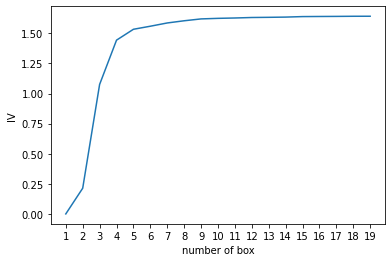

age


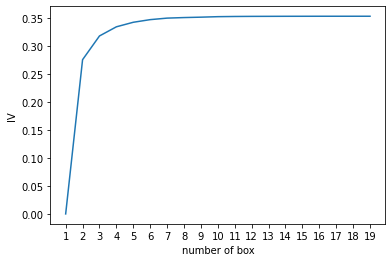

NumberOfTime30-59DaysPastDueNotWorse


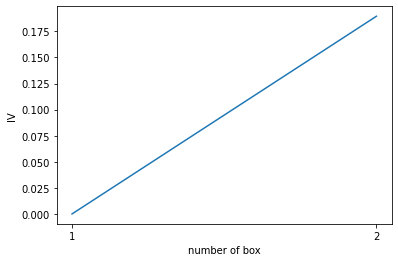

DebtRatio


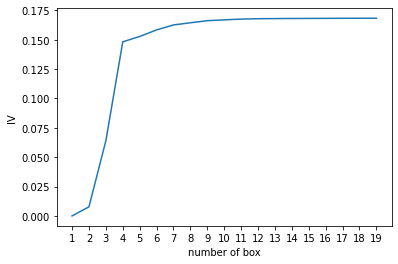

MonthlyIncome


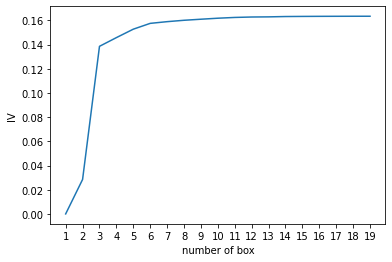

NumberOfOpenCreditLinesAndLoans


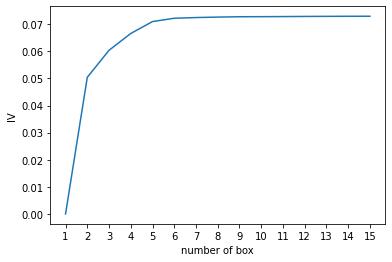

NumberOfTimes90DaysLate


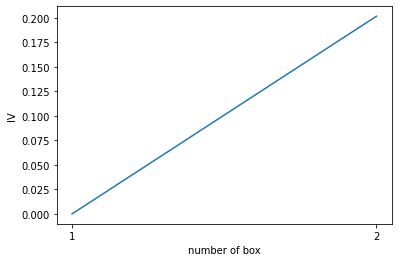

NumberRealEstateLoansOrLines


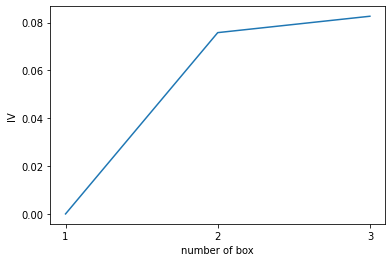

NumberOfTime60-89DaysPastDueNotWorse


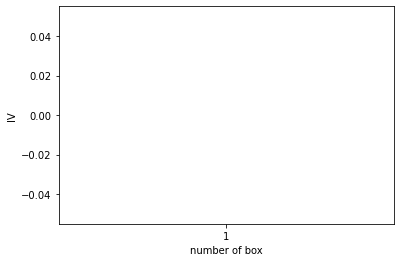

NumberOfDependents


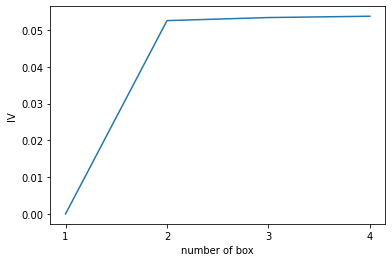

In [81]:
for i in model_data.columns[1:-1]:
    print(i)
    graphforbestbin(model_data,i,"SeriousDlqin2yrs",n=1,q=20,graph=True)

### 对所有的特征进行分箱选择
出现分箱错误的特征，分成两个特征处理：

auto_col_bins 连续型变量，可以用分箱函数

hand_bins 类别型，手动分箱

In [82]:
#可以使用分箱的特征
auto_col_bins = {"RevolvingUtilizationOfUnsecuredLines":5
                 ,
                "age":4,
                "DebtRatio":4,
                "MonthlyIncome":5,
                "NumberOfOpenCreditLinesAndLoans":5}
 
#不能使用自动分箱的变量
hand_bins = {"NumberOfTime30-59DaysPastDueNotWorse":[0,1,2,13]
            ,"NumberOfTimes90DaysLate":[0,1,2,17]
            ,"NumberRealEstateLoansOrLines":[0,1,2,54]
            ,"NumberOfTime60-89DaysPastDueNotWorse":[0,1,2,8]
            ,"NumberOfDependents":[0,1,2,3]}
 
#保证区间覆盖使用 np.inf替换最大值，用-np.inf替换最小值 
#原因：比如一些新的值出现，例如家庭人数为30，以前没出现过，改成范围为极大值之后，这些新值就都能分到箱里边了
hand_bins = {k:[-np.inf,*v[:-1],np.inf] for k,v in hand_bins.items()}

In [83]:
bins_of_col = {}
 
# 生成自动分箱的分箱区间和分箱后的 WOE值
 
for col in auto_col_bins:
    bins_df = graphforbestbin(model_data,col
                             ,"SeriousDlqin2yrs"
                             ,n=auto_col_bins[col]
                             #使用字典的性质来取出每个特征所对应的箱的数量
                             ,q=20
                             ,graph=False)
    bins_list = sorted(set(bins_df["min"]).union(bins_df["max"]))
    #保证区间覆盖使用 np.inf 替换最大值 -np.inf 替换最小值
    bins_list[0],bins_list[-1] = -np.inf,np.inf
    bins_of_col[col] = bins_list

In [84]:
#合并手动分箱数据    
bins_of_col.update(hand_bins)

bins_of_col# 所有特征的分箱结果

{'RevolvingUtilizationOfUnsecuredLines': [-inf,
  0.034018556900000003,
  0.15362815795161783,
  0.46461151075620555,
  0.9999999,
  inf],
 'age': [-inf, 54.0, 61.0, 74.0, inf],
 'DebtRatio': [-inf,
  0.017442324812644888,
  0.4016872911911622,
  1.4678046424544335,
  inf],
 'MonthlyIncome': [-inf,
  0.1,
  3.4653724870898546,
  5597.9268112764275,
  7723.0,
  inf],
 'NumberOfOpenCreditLinesAndLoans': [-inf, 1.0, 3.0, 5.0, 17.0, inf],
 'NumberOfTime30-59DaysPastDueNotWorse': [-inf, 0, 1, 2, inf],
 'NumberOfTimes90DaysLate': [-inf, 0, 1, 2, inf],
 'NumberRealEstateLoansOrLines': [-inf, 0, 1, 2, inf],
 'NumberOfTime60-89DaysPastDueNotWorse': [-inf, 0, 1, 2, inf],
 'NumberOfDependents': [-inf, 0, 1, 2, inf]}

## 开始分箱 箱内填充WOE值

In [85]:
data = model_data.copy()
 
#函数pd.cut，可以根据已知的分箱间隔把数据分箱
#参数为 pd.cut(数据，以列表表示的分箱间隔)

data = data[["age","SeriousDlqin2yrs"]].copy()
data.head()

,age,SeriousDlqin2yrs
0,53,0
1,63,0
2,39,1
3,73,0
4,53,1


In [86]:
data["cut"] = pd.cut(data["age"],[-np.inf, 36.0, 54.0, 61.0, 64.0, 74.0, np.inf])
 
data.head()

,age,SeriousDlqin2yrs,cut
0,53,0,"(36.0, 54.0]"
1,63,0,"(61.0, 64.0]"
2,39,1,"(36.0, 54.0]"
3,73,0,"(64.0, 74.0]"
4,53,1,"(36.0, 54.0]"


In [87]:
#将数据按分箱结果聚合，并取出其中的标签值
data.groupby("cut")["SeriousDlqin2yrs"].value_counts()

cut           SeriousDlqin2yrs
(-inf, 36.0]  1                   24790
              0                   14797
(36.0, 54.0]  1                   51475
              0                   39070
(54.0, 61.0]  0                   15743
              1                   12239
(61.0, 64.0]  0                    6968
              1                    3201
(64.0, 74.0]  0                   13376
              1                    4222
(74.0, inf]   0                    7737
              1                    1390
Name: SeriousDlqin2yrs, dtype: int64

In [88]:
#使用unstack()来将树状结构变成表状结构
bins_df = data.groupby("cut")["SeriousDlqin2yrs"].value_counts().unstack()
bins_df

SeriousDlqin2yrs,0,1
cut,,
"(-inf, 36.0]",14797,24790
"(36.0, 54.0]",39070,51475
"(54.0, 61.0]",15743,12239
"(61.0, 64.0]",6968,3201
"(64.0, 74.0]",13376,4222
"(74.0, inf]",7737,1390


In [89]:
bins_df["woe"] = np.log((bins_df[0]/bins_df[0].sum())/(bins_df[1]/bins_df[1].sum()))

bins_df

SeriousDlqin2yrs,0,1,woe
cut,,,
"(-inf, 36.0]",14797,24790,-0.519852
"(36.0, 54.0]",39070,51475,-0.279577
"(54.0, 61.0]",15743,12239,0.247933
"(61.0, 64.0]",6968,3201,0.774029
"(64.0, 74.0]",13376,4222,1.149317
"(74.0, inf]",7737,1390,1.712875


In [90]:
#定义新的WOE函数
# df 数据表
#col 列名
#y 标签
#bins 箱子
def get_woe(df,col,y,bins):
    df = df[[col,y]].copy()
    df["cut"] = pd.cut(df[col],bins)
    bins_df = df.groupby("cut")[y].value_counts().unstack()
    woe = bins_df["woe"] = np.log((bins_df[0]/bins_df[0].sum())/(bins_df[1]/bins_df[1].sum()))
    return woe

In [91]:
#将所有特征的WOE存储到字典当中
woeall = {}
for col in bins_of_col:
    woeall[col] = get_woe(model_data,col,"SeriousDlqin2yrs",bins_of_col[col])
    
woeall

{'RevolvingUtilizationOfUnsecuredLines': cut
 (-inf, 0.034]     2.618928
 (0.034, 0.154]    1.498029
 (0.154, 0.465]    0.172151
 (0.465, 1.0]     -0.945215
 (1.0, inf]       -2.031572
 dtype: float64,
 'age': cut
 (-inf, 54.0]   -0.351532
 (54.0, 61.0]    0.247933
 (61.0, 74.0]    1.004367
 (74.0, inf]     1.712875
 dtype: float64,
 'DebtRatio': cut
 (-inf, 0.0174]     1.512637
 (0.0174, 0.402]    0.036351
 (0.402, 1.468]    -0.389029
 (1.468, inf]       0.176126
 dtype: float64,
 'MonthlyIncome': cut
 (-inf, 0.1]           1.406019
 (0.1, 3.465]          0.007421
 (3.465, 5597.927]    -0.286787
 (5597.927, 7723.0]    0.068670
 (7723.0, inf]         0.353923
 dtype: float64,
 'NumberOfOpenCreditLinesAndLoans': cut
 (-inf, 1.0]   -0.839573
 (1.0, 3.0]    -0.328880
 (3.0, 5.0]    -0.058563
 (5.0, 17.0]    0.123530
 (17.0, inf]    0.466351
 dtype: float64,
 'NumberOfTime30-59DaysPastDueNotWorse': cut
 (-inf, 0.0]    0.353387
 (0.0, 1.0]    -0.873475
 (1.0, 2.0]    -1.378697
 (2.0, inf]  

In [92]:
#不希望覆盖掉原本的数据，创建一个新的DataFrame，索引和原始数据model_data一模一样
model_woe = pd.DataFrame(index=model_data.index)
 
#将原数据分箱后，按箱的结果把WOE结构用map函数映射到数据中
model_woe["age"] = pd.cut(model_data["age"],bins_of_col["age"]).map(woeall["age"])
model_woe.head()

,age
0,-0.351532
1,1.004367
2,-0.351532
3,1.004367
4,-0.351532


### 得到最终特征矩阵

In [93]:
#对所有特征操作可以写成：
for col in bins_of_col:
    model_woe[col] = pd.cut(model_data[col],bins_of_col[col]).map(woeall[col])
    
#将标签补充到数据中
model_woe["SeriousDlqin2yrs"] = model_data["SeriousDlqin2yrs"]
 
#这就是我们的建模数据了
model_woe.head()

,age,RevolvingUtilizationOfUnsecuredLines,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTime30-59DaysPastDueNotWorse,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,SeriousDlqin2yrs
0,-0.351532,2.618928,0.036351,-0.286787,-0.058563,0.353387,0.234152,-0.392721,0.124716,0.626685,0
1,1.004367,0.172151,0.036351,-0.286787,-0.058563,0.353387,0.234152,-0.392721,0.124716,0.626685,0
2,-0.351532,-2.031572,-0.389029,-0.286787,-0.058563,-0.873475,-1.747865,-0.392721,-1.766498,-0.474818,1
3,1.004367,1.498029,-0.389029,-0.286787,0.123530,0.353387,0.234152,0.618129,0.124716,0.626685,0
4,-0.351532,-0.945215,-0.389029,0.353923,0.123530,0.353387,0.234152,0.618129,0.124716,-0.582404,1


### 处理测试集

In [94]:
vali_woe = pd.DataFrame(index=vali_data.index)
 
for col in bins_of_col:
    vali_woe[col] = pd.cut(vali_data[col],bins_of_col[col]).map(woeall[col])
vali_woe["SeriousDlqin2yrs"] = vali_data["SeriousDlqin2yrs"]
 
vali_X = vali_woe.iloc[:,:-1]
vali_y = vali_woe.iloc[:,-1]

In [95]:
vali_X.head()

,RevolvingUtilizationOfUnsecuredLines,age,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTime30-59DaysPastDueNotWorse,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,2.618928,0.247933,1.512637,-0.286787,-0.058563,0.353387,0.234152,-0.392721,0.124716,0.626685
1,-0.945215,-0.351532,0.036351,0.353923,0.123530,0.353387,0.234152,0.618129,0.124716,-0.474818
2,1.498029,1.004367,0.036351,0.068670,-0.058563,0.353387,0.234152,-0.392721,0.124716,0.626685
3,2.618928,-0.351532,0.036351,-0.286787,0.123530,0.353387,0.234152,0.193140,0.124716,0.626685
4,-0.945215,-0.351532,0.036351,-0.286787,0.123530,0.353387,0.234152,-0.392721,0.124716,-0.582404


## 建模

In [96]:
X = model_woe.iloc[:,:-1]
y = model_woe.iloc[:,-1]
X

,age,RevolvingUtilizationOfUnsecuredLines,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTime30-59DaysPastDueNotWorse,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,-0.351532,2.618928,0.036351,-0.286787,-0.058563,0.353387,0.234152,-0.392721,0.124716,0.626685
1,1.004367,0.172151,0.036351,-0.286787,-0.058563,0.353387,0.234152,-0.392721,0.124716,0.626685
2,-0.351532,-2.031572,-0.389029,-0.286787,-0.058563,-0.873475,-1.747865,-0.392721,-1.766498,-0.474818
3,1.004367,1.498029,-0.389029,-0.286787,0.123530,0.353387,0.234152,0.618129,0.124716,0.626685
4,-0.351532,-0.945215,-0.389029,0.353923,0.123530,0.353387,0.234152,0.618129,0.124716,-0.582404
...,...,...,...,...,...,...,...,...,...,...
195003,-0.351532,-0.945215,-0.389029,0.068670,0.123530,-1.378697,0.234152,0.193140,0.124716,-0.474818
195004,-0.351532,-0.945215,0.036351,-0.286787,0.123530,-0.873475,0.234152,0.193140,0.124716,-0.527785
195005,-0.351532,-0.945215,-0.389029,0.353923,0.123530,0.353387,0.234152,0.193140,0.124716,-0.474818
195006,1.004367,-0.945215,0.036351,0.353923,0.123530,0.353387,0.234152,0.261316,0.124716,0.626685


In [97]:
from sklearn.linear_model import LogisticRegression as LR

lr = LR().fit(X,y)
lr.score(vali_X,vali_y)

0.7721355413037235

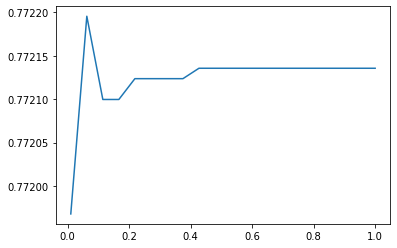

D:\Software\anaconda\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
D:\Software\anaconda\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
D:\Software\anaconda\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
D:\Software\anaconda\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
D:\Software\anaconda\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("L

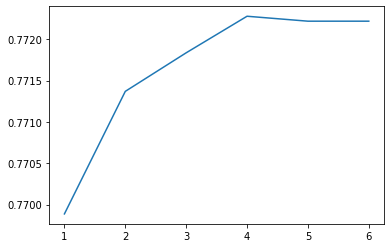

In [98]:
c_1 = np.linspace(0.01,1,20)
c_2 = np.linspace(0.01,0.2,20)
 
score = []
for i in c_1: 
    lr = LR(solver='liblinear',C=i).fit(X,y)
    score.append(lr.score(vali_X,vali_y))
plt.figure()
plt.plot(c_1,score)
plt.show()
 
lr.n_iter_#array([7], dtype=int32)
 
score = []
for i in [1,2,3,4,5,6]: 
    lr = LR(solver='liblinear',C=0.025,max_iter=i).fit(X,y)
    score.append(lr.score(vali_X,vali_y))
plt.figure()
plt.plot([1,2,3,4,5,6],score)
plt.show()

<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

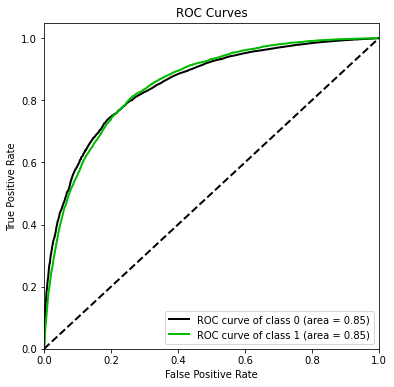

In [99]:
import scikitplot as skplt
 
#%%cmd
#pip install scikit-plot
 
vali_proba_df = pd.DataFrame(lr.predict_proba(vali_X))
skplt.metrics.plot_roc(vali_y, vali_proba_df,
                        plot_micro=False,figsize=(6,6),
                        plot_macro=False)

In [100]:
B = 20/np.log(2)
A = 600 + B*np.log(1/60)
 
B,A

(28.85390081777927, 481.8621880878296)

In [101]:
base_score = A - B*lr.intercept_#lr.intercept_：截距
base_score#array([481.56390143])

array([481.87472505])

In [102]:
woeall["age"]

cut
(-inf, 54.0]   -0.351532
(54.0, 61.0]    0.247933
(61.0, 74.0]    1.004367
(74.0, inf]     1.712875
dtype: float64

In [103]:
score_age = woeall["age"] * (-B*lr.coef_[0][1])#lr.coef_：每一个特征建模之后得出的系数
score_age#"age"特征中每个箱对应的分数

cut
(-inf, 54.0]    -7.591423
(54.0, 61.0]     5.354168
(61.0, 74.0]    21.689572
(74.0, inf]     36.989980
dtype: float64

In [104]:
file = "ScoreData.csv"

#open是用来打开文件的python命令，第一个参数是文件的路径+文件名，如果你的文件是放在根目录下，则你只需要文件名就好
#第二个参数是打开文件后的用途，"w"表示用于写入，通常使用的是"r"，表示打开来阅读
#首先写入基准分数
#之后使用循环，每次生成一组score_age类似的分档和分数，不断写入文件之中
 
with open(file,"w") as fdata:
    fdata.write("base_score,{}\n".format(base_score))
for i,col in enumerate(X.columns):#[*enumerate(X.columns)]
    score = woeall[col] * (-B*lr.coef_[0][i])
    score.name = "Score"
    score.index.name = col
    score.to_csv(file,header=True,mode="a")